<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

In [133]:
from sympy import symbols, Symbol, Eq, solve
from sympy import *
from sympy.interactive import printing
from ipywidgets import interact_manual, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
import pylab

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  alargo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [31]:
#únicamente se copia lo que el ejercicio busca que regrese i.e 𝑟𝑥(1−𝑥)
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [32]:
#Creamos la ecuación, definiendo las variables y usando la función Eq(li,ld)
x,r=symbols('x r')
eq= Eq(x,r*x*(1-x))
eq

Eq(x, r*x*(1 - x))

In [33]:
#Substituimos r=2 usando subs() y resolvemos usando solve()
solve(eq.subs(r, 2))

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [34]:
#de la clase: resolviendo r*x*(1-x) para el punto fijo x=1-1/r tq se cumpla la condición 0≤𝑥≤1
solve(abs(diff(logistic_map(x,r),x)).subs(x,1-1/r)<1)

(1 < r) & (r < 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [35]:
#Función de la clase
def iterar(g, x0, N, r):
    # Ejercicio
    if N==0:
        return x0
    if N>1:
        return g(iterar(g,x0,N-1,r),r)
    else:
        return g(x0,r)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [36]:
#Función de la clase
def iterarLista(g, x0, N, mu):
    return [iterar(g,x0,i,mu) for i in range(N)]

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

Se utiliza iterar para los valores r 

In [91]:
iterar(logistic_map, 0.35, 100, 0.8)

2.3214239237182962e-11

In [92]:
iterar(logistic_map, 0.35, 100, 1.2)

0.16666666668119187

In [93]:
iterar(logistic_map, 0.35, 100, 2.8)

0.6428571428586157

In [96]:
iterar(logistic_map, 0.35, 100, 3.2)

0.5130445095326298

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [160]:
#Creamos una función que tome de parámetros libres r,x0 y dentro de ella definimos g=logistic map y N=100
#Esto nos dará libertad del widget para r y x0, pero no para g y N que serán fijos
#Hacemos que nos regrese una gráfica con x siendo el numero de iteración y y siendo [𝑥0,𝑔(𝑥),𝑔(𝑔(𝑥)),…𝑔(𝑔(…(𝑔(𝑥))…))]
#las iteraciones
def wid(r,x0):
    yx=iterarLista(logistic_map,x0,100,r)
    xx=list(range(100))
    plt.plot(xx,yx)

interactive(children=(FloatSlider(value=0.01, description='r', max=4.0), FloatSlider(value=0.01, description='…

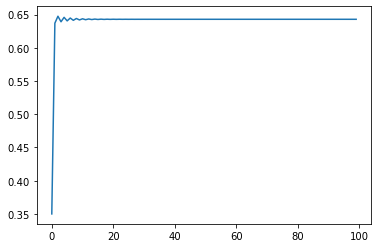

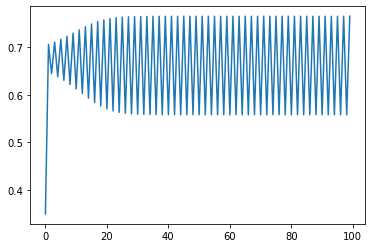

In [161]:
#Creamos un widget que tome la función de arriba y permita slidear los valores r y x0 en unidades flotantes
interact_manual(wid, r=FloatSlider(value=0.01,min=0,max=4,step=0.1),x0=FloatSlider(value=0.01,min=0,max=1,step=0.005));

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

In [121]:
#SE PUEDE HACER EN EL WIDGET, PERO PARA PODER MOSTRAR Y GUARDAR LAS GRÁFICAS DECIDÍ HACERLO INDIVIDUAL (pruebe el widget :D)
x=list(range(100))
y1=iterarLista(logistic_map, 0.35, 100, 2.8)
y2=iterarLista(logistic_map, 0.35, 100, 3.1)

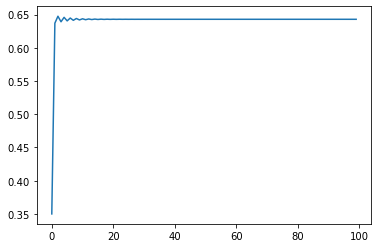

In [122]:
plt.plot(x,y1)

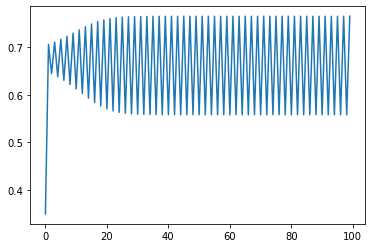

In [123]:
plt.plot(x,y2)

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [157]:
#Al igual que la funcion de arriba, creamos una función que deje libre r pero tenga x restingido, en este caso un 
#list(range(100))
def wid2(r):
    x=list(range(100))
    xn=[]
#Tenemos por definicion dada arriba, x𝑛+1=𝑟𝑥𝑛(1−𝑥𝑛)
    for i in x:
        xn_i=r*i*(1-i)
        xn.append(xn_i)
    plt.plot(x,xn)
#La gráfica y=x, es decir x,x
    plt.plot(x,x)

interactive(children=(FloatSlider(value=0.01, description='r', max=4.0), Button(description='Run Interact', st…

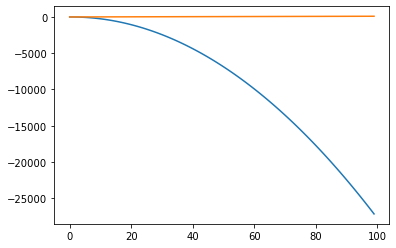

In [158]:
interact_manual(wid2, r=FloatSlider(value=0.01,min=0,max=4,step=0.1));

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

In [177]:
def wid3(r):
    ya=iterarLista(logistic_map,0.35,100,r)
    seg=[[0.35,0.35]]
    for i in ya:
        l=[seg[-1][-1],i]
        seg.append(l)
    seg.remove([0.35,0.35])
    return seg

In [178]:
interact_manual(wid3, r=FloatSlider(value=0.01,min=0,max=4,step=0.1));

interactive(children=(FloatSlider(value=0.01, description='r', max=4.0), Button(description='Run Interact', st…

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [179]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [181]:
def logistic_mapDosPuntoCero(x,mu):
    return 1-mu*(x**2)

In [186]:
x,u=symbols('x mu')
eq2= Eq(x,1-u*(x**2))
eq2

Eq(x, -mu*x**2 + 1)

In [191]:
#Punto fijo
eq2.subs(x, 1).rhs

1 - mu

In [192]:
#Los valores de  𝑟  para cuales cambia de estable a inestable y viceversa, se llaman puntos de bifurcación.
solve(abs(diff(logistic_mapDosPuntoCero(x,u),x)).subs(x,1-u)<1)

(mu < 1/2 + sqrt(3)/2) & (1/2 - sqrt(3)/2 < mu)

In [194]:
#Nueva grafica de logistic_mapDosPuntoCero
def wid4(u,x0):
    yx=iterarLista(logistic_mapDosPuntoCero,x0,100,u)
    xx=list(range(100))
    plt.plot(xx,yx)

interactive(children=(FloatSlider(value=0.01, description='u', max=1.3860000000000001, min=-0.386), FloatSlide…

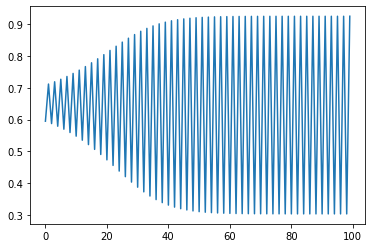

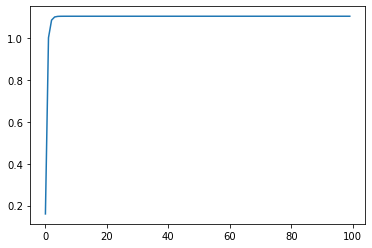

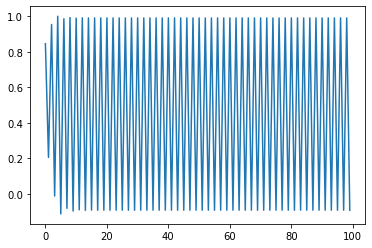

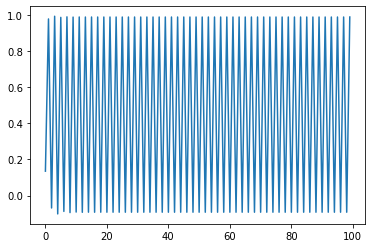

In [196]:
interact_manual(wid4, u=FloatSlider(value=0.01,min=0.5-0.886,max=0.5+0.886,step=0.1),x0=FloatSlider(value=0.01,min=0,max=1,step=0.005));

In [200]:
#Cob Web
def wid5(u):
    x=list(range(100))
    xn=[]
#Tenemos por definicion dada arriba, x𝑛+1=𝑟𝑥𝑛(1−𝑥𝑛)
    for i in x:
        xn_i=-u*i**2
        xn.append(xn_i)
    plt.plot(x,xn)
#La gráfica y=x, es decir x,x
    plt.plot(x,x)

interactive(children=(FloatSlider(value=0.01, description='u', max=1.3860000000000001, min=-0.386), Button(des…

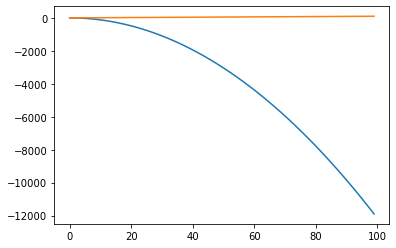

In [201]:
interact_manual(wid5, u=FloatSlider(value=0.01,min=0.5-0.886,max=0.5+0.886,step=0.1));

In [202]:
#Segmentos de Línea
def wid6(r):
    ya=iterarListaDosPuntoCer(logistic_map,0.35,100,r)
    seg=[[0.35,0.35]]
    for i in ya:
        l=[seg[-1][-1],i]
        seg.append(l)
    seg.remove([0.35,0.35])
    return seg

In [203]:
interact_manual(wid3, r=FloatSlider(value=0.01,min=0,max=4,step=0.1));

interactive(children=(FloatSlider(value=0.01, description='r', max=4.0), Button(description='Run Interact', st…